### Game of Pig

Rules:

1. Two players take turns rolling a single die as many times as they wish. Each roll adds a score equal to the number rolled to the player's total.
2. If a player rolls a 1, their score for that turn is zero, and their turn ends.
3. At any point during a player's turn, they can choose to stop rolling and keep their score. The first player to reach 100 wins.

For any given turn, the probability of losing is $\frac{1}{6}$ and the probability of winning is $\frac{5}{6}$. The expected value of losing is zero, while the expected value of winning is the mean value of $\{2,3,4,5,6\}$ = 4.  Thus, the expected value of a roll is $\frac{1}{6}(0) + \frac{5}{6}(4) = \frac{20}{6} = \frac{10}{3} = 3.333$.





Thus, if imagine now rolling many times, we see that the expected value of looks like:

$$ \frac{1}{6} (0) + \frac{5}{6} ( \frac{1}{6} (0) + \frac{5}{6} ( \frac{1}{6} (0) + ... ) ) $$

The only non-zero term in this expansion will be the last term, which will have the value $4 \cdot N_{roll}$, where $N_{roll}$ is the number of rolls.  Thus, the expected value of rolling $N_{roll}$ times is:

$$(\frac{5}{6})^{N_{roll}} (4N_{roll})$$

Text(0.5, 1.0, 'Expected Value of Rolling N Times')

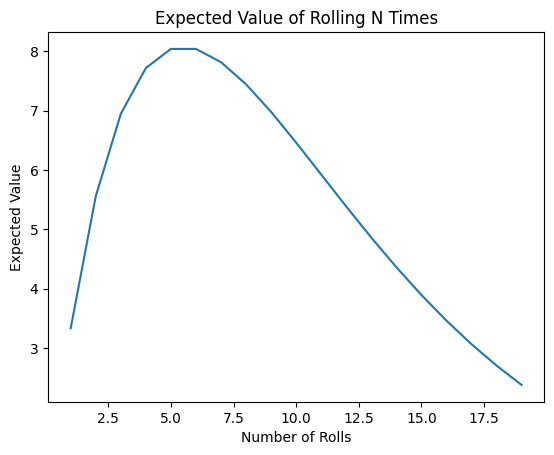

In [1]:
import numpy as np
import matplotlib.pyplot as plt

nroll = np.arange(1, 20)
prob = (5/6)**nroll * 4 * nroll

plt.plot(nroll, prob)
plt.xlabel('Number of Rolls')
plt.ylabel('Expected Value')
plt.title('Expected Value of Rolling N Times')

Considering now the score-based strategy, we assume that the player will stop rolling when their score is greater than or equal to $N_{stop}$.  Further, since the expected value of a non-losing turn is  4, we can assume that, on overage, we will have that $\frac{N_{stop}}{4} = N_{roll}$.

Thus, the expected value of a score-based strategy is:

$$(\frac{5}{6})^{N_{roll}} (4N_{roll}) = (\frac{5}{6})^{\frac{N_{stop}}{4}} (4 \frac{N_{stop}}{4}) = (\frac{5}{6})^{\frac{N_{stop}}{4}} N_{stop}$$

Text(0.5, 1.0, 'Expected Value of Score-Based Strategy')

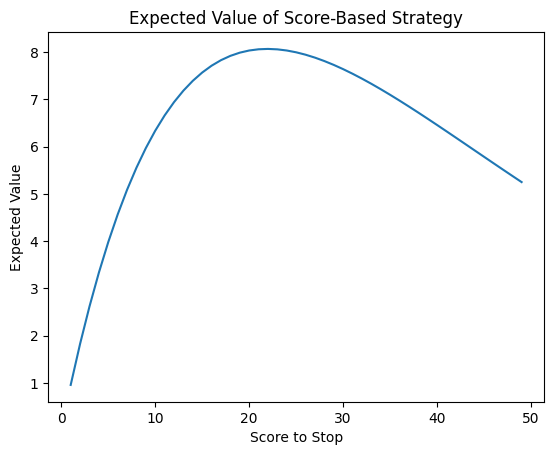

In [2]:
nstop = np.arange(1,50)
prob = (5/6)**(nstop/4) * nstop

plt.plot(nstop, prob)
plt.xlabel('Score to Stop')
plt.ylabel('Expected Value')
plt.title('Expected Value of Score-Based Strategy')

Where is the maximum of this curve?

$$\frac{d}{dN_{stop}} (\frac{5}{6})^{\frac{N_{stop}}{4}} N_{stop} = 0$$

In [3]:
from sympy import *
init_printing(use_unicode=True)

nstop = symbols('nstop')
expr = (5/6)**(nstop/4) * nstop

print("Expected value = ",expr)

print("Derivative = ", diff(expr, nstop),"= 0")

print("nstop_max = ",solve(diff(expr, nstop), nstop))


Expected value =  0.833333333333333**(nstop/4)*nstop
Derivative =  -0.0455803891984886*0.833333333333333**(nstop/4)*nstop + 0.833333333333333**(nstop/4) = 0
nstop_max =  [21.9392597909883]


In [4]:
nroll = symbols('nstop')
expr = (5/6)**(nroll) * (4*nroll)

print("Expected value = ",expr)

print("Derivative = ", diff(expr, nroll),"= 0")

print("nroll_max = ",solve(diff(expr, nroll), nroll))


Expected value =  4*0.833333333333333**nstop*nstop
Derivative =  -0.729286227175818*0.833333333333333**nstop*nstop + 4*0.833333333333333**nstop = 0
nroll_max =  [5.48481494774708]
